<center>
    <h1> ILI286 - Computación Científica II  </h1>
    <h2> Tarea 2 </h2>
    <h2> 07 de septiembre del 2016</h2>
    <h4> Roberto Felipe Fuentes Zenteno - 201173037-2 - roberto.fuentes@alumnos.usm.cl</h4>
</center>


<h1> Tabla de Contenidos</h1>

* [1.- Introducción](#int)
* [2.- Objetivos](#obj)
* [3.- _Buckling of a Circular Ring_](#buck)
* [4.- Broyden's Method](#broy)
* [5.- Desarrollo de ejercicios](#desa)
     - [Pregunta 1](#pregunta1)
     - [Pregunta 2](#pregunta2)
     - [Pregunta 3](#pregunta3)
     - [Pregunta 4](#pregunta4)
* [6.- Bonus](#bon)
* [7.- Conclusión](#con)
* [8.- Referencias](#ref)

<div id='int' />
## Introducción

En este laboratorio investigaremos y aprenderemos a usar diversos metodos para resolver ecuaciones diferenciales ordinarias, como lo son el _shooting method_ y _finite diferential method_. Ademas veremos su uso en aplicaciones reales, como lo es la construcción de anillos de submarinos, con tal de que al hundirlos en agua, los anillos puedan soportar la presión que se ejerce en el.

<div id='obj' />
<h3> Objetivos </h3>

<ol>
<li> Estudiar un caso de aplicación de problemas condición de frontera </li>
<li> Aprender y analizar métodos mas complejos para la solución numérica de sistemas ecuaciones no lineales (raíces)</li>
<li> Realizar un análisis cualitativo y cuantitativo al método de disparo aplicado a un sistema de ecuaciones </li>

</ol>

<div id='buck' />
<h3> Buckling of a Circular Ring </h3>

<p> Los problemas de condición de frontera son modelos naturales para cálculos de estructuras, en este caso analizaremos el problema de <b> <em> Buckling Circular Ring </em></b> el cual es un problema de importancia para la construcción de buques submarinos. Este problema consiste en un sistema de siete ecuaciones, los cuales sirven como representación  del anillo circular con compresibilidad <code>'c'</code> bajo presión hidroestática <code>'p'</code> la cual proviene de todas direcciones.  </p>

<p> El modelo será adimensional por simplicidad, y se va a asumir que el anillo tiene radio 1 con simetría tanto horizontal com vertical cuando no existe presión. Incluso con este modelo simplificado, su implementación será útil para el estudio del fenómeno de <em>Pandeo</em>(Buckling), o colapso de la forma circular de un anillo.  </p>
<img src="image1.png",width=600,height=600>

<p> <i><b>Imagen 1</b> : Representación Gráfica de las soluciones. En la imagen de la derecha se está efectuando una presión interna <code>p</code>. Las 3 circunferencias representan soluciones estables.</i> Imagen obtenida de [1]. </p>

Como se puede analizar en la imagen, a la izquierda se encuentra el fenómeno visual con presión nula, es decir <code> p = 0 </code> . La variable <code>s</code> representa la longitud de arco. En la imagen de la derecha se encuentra el fenómeno bajo una presión <code>p = 3.8</code> e índice de compresibilidad <code> c = 0.01 </code>, en donde existen 3 posibles soluciones al sistema de ecuacioń: El anillo sin deformación con radio 1, y el anillo comprimido vertical y horizontalmente(observar imagen a la derecha con 3 circunferencias). Todas estas soluciones son consideradas 'estables'.

<p>Además, el modelo solo contará con el cuarto superior izquierdo (Primer Cuadrante) del anillo, el resto puede completarse con criterios asumidos de simetría. En este caso la variable independiente <code>'s'</code> representa la longitud de arco alrededor la linea central del anillo, el cual posee un rango <code>[0,π/2]</code>. Las variables dependientes en el punto especificado por la longitud de arco son las siguientes  </p>

<h4> Modelo Buclking Ring </h4>
  <p><b>$y_1(s)$ = </b> Ángulo de la linea central con respecto a la horizontal  </p>
  <p><b>$y_2(s)$ = </b> Coordenada-x</p>
  <p><b>$y_3(s)$ = </b> Coordenada-y</p>
  <p><b>$y_4(s)$ = </b> Longitud de arco a lo largo de linea central deformada </p>
  <p><b>$y_5(s)$ = </b> Fuerza axial interna </p>
  <p><b>$y_6(s)$ = </b> Fuerza normal interna</p>
  <p><b>$y_7(s)$ = </b> Momentum de flexión</p>

<p>El problema de frontera a analizar será el siguiente</p>
$$
\begin{array}{lll}
y'_1 = -1 - cy_{5} + (c + 1)y_{7} & \displaystyle y_{1}(0)=\frac{\pi}{2} & \displaystyle y_{1}\left(\frac{\pi}{2}\right)= 0\\
y'_2 = \left( 1 + c(y_{5} - y_{7}) \right)\cos y_{1} & & \displaystyle y_{2}\left(\frac{\pi}{2} \right)= 0\\
y'_3 = \left(1 + c(y_{5} - y_{7}) \right)\sin y_{1} & y_{3}(0)= 0 & \\
y'_4 = 1 +  c(y_{5} - y_{7}) & y_{4}(0)= 0 & \\
y'_5 = -y_{6}(-1 - cy_{5} + ( c + 1 )y_{7}) & & \\
y'_6 = y_{7}y_{5} - \left(1 + c(y_{5} - y_{7})\right)(y_5 + p) & y_{6}(0)=0 & \displaystyle y_{6}\left(\frac{\pi}{2}\right)= 0 \\
y'_7 = (1 + c(y_5 - y_7))y_6 & & \\
\end{array}
$$



<p>En este ejercicio ,se va a implementar el 'método del disparo' para el sistema de ecuaciones presentado, de modo que para encontrar encontrar la raiz <code>F(s) = 0 </code> es necesario un método mas complejo que el método de bisección, de modo que introducimos el <em>método de Broyden</em> </p>

<div id='broy' />
<h3> Broyden's Method </h3>
<p>En análisis numérico, el método de Broyden es un método quasi-Newtoniano para encontrar raíces en un sistema de <code>k</code> variables. El conocido método de Newton es usado para encontrar un x tal que <code>f(x) = 0</code>, y para ello usa la matriz jacobiana <b><code>J</code></b>. Sin embargo, calcular esta matriz puede resultar en un costo computacional muy alto en algunos casos. La idea del método de Broyden es calcular la matriz jacobiana solo en la primera iteración, y generar actualizaciones en las siguientes iteraciones. </p>

<p> El pseudocódigo para el método de Broyden es el siguiente. Note que como parametros de entrada se necesita un vector de soluciones inicial $x_0$ y una matriz $B_0$ , la cual si es imposible de calcular, se puede usar $B_0 = I$: </p>
<h3> Broyden's Method PseudoCode </h3>

$1. \enspace x_0 = Initial Vector $

$2. \enspace B_0 = Initial Matrix $

$3. \enspace \textbf{for }  i = 0,1,2,...$

$4. \quad \quad x_{i+1} = x_{i} - B_{i} F(x_i)$

$5. \quad \quad B_{i+1} = B_{i} + \frac{(\delta_{i+1} - B_{i}\Delta_{i+1})\delta_{i+1}^T B_i}{\delta_{i+1}^T B_i\Delta_{i+1}}$

$6.\enspace \textbf{end}$

$7. \quad \quad where \enspace  \delta_i = x_i - x_{i-1} and \enspace \Delta_i = F(x_i) - F(x_{i-1})$



<div id='desa' />
## Desarrollo de ejercicios

<div id='pregunta1' />
### Pregunta 1

<ul style="list-style-type: none;">
<li>
        
        <b>a)</b> Implemente el método de Broyden. Recuerde que para analizar la raiz de $F(x)$ en un sistema de ecuaciones debe analizar $||F(x)||_{2}$. Para comprobar el correcto funcionamiento del método, impleméntelo en el sistema de ecuaciones: 
        
        $$ F(x) = \begin{pmatrix} x_2^2 - x_1^3  \\ x_1^2 + x_2^2 - 1 \end{pmatrix} $$
        $$ x_0 =  \begin{pmatrix} 1 \\ 1 \end{pmatrix} \quad \quad B_{0} = F^{'}(x_0) $$
 <p> Compruebe sus resultados con la libreria <code> scipy.optimize.broyden2 </code> el cual tiene el método de Broyden II implementado. Para distintos supuestos iniciales, analize el error absoluto entre el valor obtenido mediante la función implementada por usted y la función de <code> scipy.optimize. </code>    </p> $$$$
 <p> <i> El método scipy.optimize.broyden2 debe recibir como parámetros una función que tenga como parámetros un array de valores iniciales [x0,x1,x2,...]  y que retorne el valor de cada una de las ecuaciones del sistema. El segundo parámetro del método es un array con los valores iniciales:</i> </p> $$$$
$\enspace def \enspace F(x): \\$

$\enspace \enspace return [x[0]**2 + x[1]**2 - 2, exp(x[0]-1) + x[1]**3 - 2]$
 
    </li>
    
</ul>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.integrate import odeint
from matplotlib import gridspec
import time
%matplotlib inline

Para implementar el método de _broyden_ seguimos el _pseudo-codigo_ implementado por la misma pregunta:
```python
def Broyden(F,InitialVector,InitialMatrix):
    x_0 = InitialVector
    B_0 = InitialMatrix 
    for i = 0,1,2,...:
        x_{i+1} = x_{i} - B_{i} F(x_i)
        B_{i+1} = B_{i} + delta_{i+1} - B_{i}*Delta_{i+1}*delta_{i+1}^T B_i}/(delta_{i+1}^T*B_i*Delta_{i+1}
    end
where delta_i = x_i - x_{i-1} Delta_i = F(x_i) - F(x_{i-1})
```
Donde la función recibirá 3 parámetros, los cuales son una matriz con las funciones a la cuales yo quiero encontrar sus soluciones {$x_1$,$x_2$, $\cdots$ ,$x_n$}, un vector inicial _inicialVector_ para comenzar, y una matriz _inicialMatrix_, la cual sera el jacobiano de nuestra función, es decir, una matriz con los gradientes de cada función (sus derivadas parciales). Para el caso particular de esta tarea, llamaremos _F(x)_ a la funcion que recibe como parametro un vector $\vec{x}$, y evalua estos valores en la matriz de funciones _F_. Además, calcularemos _Fp(x)_ , la cual es la matriz jacobiana de la función _F_ evaluada en el vector $\vec{x}$.

In [26]:
#funcion pedida en pregunta 1
def F(x):
    return np.array([(x[1]**2 - x[0]**3), x[0]**2 + x[1]**2 - 1])
#jacobiano de la funcion
def F_p(x):
    return np.array([[(-3*x[0]**2), 2*x[1]],[2*x[0], 2*x[1]]])

#inicial guess
x_0 = np.array([1,1])

#calculamos la matriz jacobiana
B_0 = F_p(x_0)

#definimos la funcion de broyden
def broyden(F,x_inicial,B_inicial):
    tol = 1e-7
    x0 = x_inicial
    B0 = B_inicial
    x_i = x0
    B_i = B0
    g_i = 1
    #si la norma de g_i es mayor que una tolerancia, entonces se termina el while y se retorna x_i.
    while((np.linalg.norm(g_i)>tol)):
        x_i_anterior = x_i
        #aqui actualizamos el vector x_i
        x_i = x_i - np.dot(B_i,F(x_i))
        g_i = x_i - x_i_anterior
        d_i = F(x_i) - F(x_i_anterior)
        #aqui actualizamos la matriz B_i
        B_i = B_i + (1/(np.dot(np.dot(np.transpose(g_i),B_i),d_i)))*np.dot(np.dot((g_i - np.dot(B_i,d_i)),np.transpose(g_i)),B_i)
        #si el absoluto de esta funcion es menor que una tolerancia, nos retornara x_i
        if(abs(np.dot(np.dot(np.transpose(g_i),B_i),d_i)) < 1e-15):
            return x_i
    return x_i

#comparamos nuestro resultado con lo proporcionado por la biblioteca de scipy
x1 = scipy.optimize.broyden2(F, x_0, f_tol=1e-14)
print("Resultado real: ")
print(x1)
print("\n")
print("Resultado mio:")
x2 = broyden(F,x_0,B_0)
print(x2)

Resultado real: 
[ 0.75487767  0.65586562]


Resultado mio:
[ 0.75487767  0.65586562]


Nos damos cuenta de que el valor con el _initial guess_ dado es el mismo. Es importante destacar que si el _initial guess_ se aleja un poco de la solución, esta tendera a diverger, por lo que el _initial guess_ debe ser un vector de solución cercano a la solución real.

<div id='pregunta2' />
### Pregunta 2

<ul style="list-style-type: none;">

    <li><b>b) </b> Resuelva el problema de Buckling Ring, el sistema de ecuaciones BVP con <em>Shooting Method</em> para valores de compresión <code> c = 0.001 </code> y  presiones <code>p = 0</code> y <code>p = 3 </code>(manteniendo <code>c</code> fijo en ambos casos). Dado que es un sistema de ecuaciones, la función <code>F</code> debe tener los parámetros de entrada los valores iniciales que no se encuentran estimados en el enunciado, es decir, $y_{2}(0)$,$y_{5}(0)$,$y_{7}(0)$ y retornar  los valores finales que no se encuentran en el enunciado($y_1(\frac{\pi}{2})$,$y_2(\frac{\pi}{2})$,$y_6(\frac{\pi}{2})$)
    
    <p> Recuerde que dado Shooting Method es necesario usar un ODE-Solver para resolver Problemas de Valor Inicial (IVP) como Euler Method.Es recomendable que implemente una función que tome como parámetro un array de funciones (las 7 funciones del sistema de ecuaciones) y resuelva a la vez todas las funciones. </p>$$$$
    
    </li>
    
</ul>

In [27]:
#Definimos las ecuaciones diferenciales planteadas en el enunciado
def F_br(y):
    sol = []
    sol.append( -1 - c*y[4] +( c + 1 )*y[6])
    sol.append((1 + c*(y[4] - y[6]))*np.cos(y[0]))
    sol.append((1 + c*(y[4] - y[6]))*np.sin(y[0]))
    sol.append(1 + c*(y[4] - y[6]))
    sol.append(-y[5] * (-1 - c*y[4] + (c+1)*y[6]))
    sol.append(y[6]*y[4] -(1+c*(y[4] -y[6]))*(y[4] + p))
    sol.append((1+c*(y[4] - y[6]))*y[5])
    return np.array(sol)
    
#resolvemos el problema con el metodo de euler, pasandole los 3 initial guess y2,y5 e y7.
def solve_buckling_ring(y):
    [y2_0, y5_0, y7_0] = y
    #creamos el inical guess completo, con los 7 valores iniciales de cada ODE
    xi = np.array([(np.pi/2),y2_0,0,0,y5_0,0,y7_0])
    #discretizamos el espacio en 200 puntos de 0 a pi/2, ya que conocemos los valores en ese extremo.
    time_grid = np.linspace(0,np.pi/2,200)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        xi = xi + h*F_br(xi)
    #retornamos los 3 valores en pi/2    
    return np.array([xi[0],xi[1],xi[5]])

<div id='pregunta3' />
### Pregunta 3

<ul style="list-style-type: none;">
    <li> <b>c)</b> Grafique las soluciones del punto anterior, utilizando la curva generada por $y_2(s)$ , $y_3(s)$ las cuales representan la curva de un cuarto del anillo en el primer cuadrante. Utilizando criterios de simetría, grafique el anillo completo. 
    </li>$$$$
    
</ul>

Ejecutamos denuevo nuestro algoritmo para encontrar con _broyden_ nuestros _inicial guess_ cercanos a los reales. Una vez encontramos estos valores, eejcutamos encontramos las soluciones de las 7 ecuaciones con euler, teniendo cuidado de guardar los valores de _y2_ e _y3_, los cuales corresponden a las coordenadas _x_ e_ y_ del _buckling ring_. Graficando con _p = 0_ y _p = 3_ tenemos lo siguiente : 

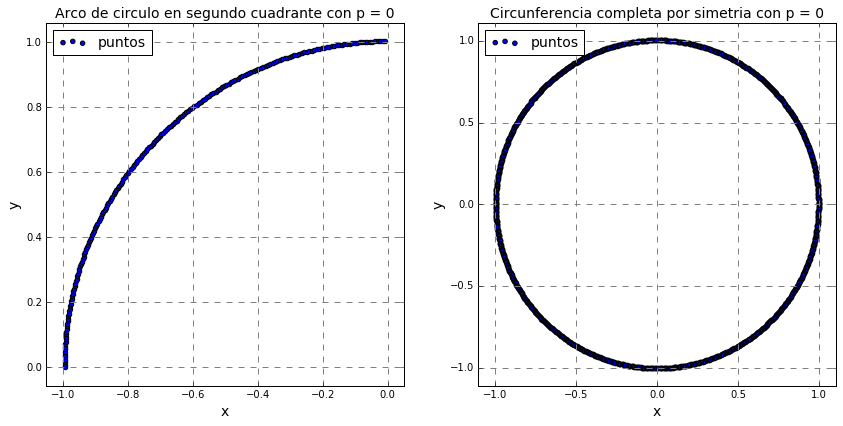

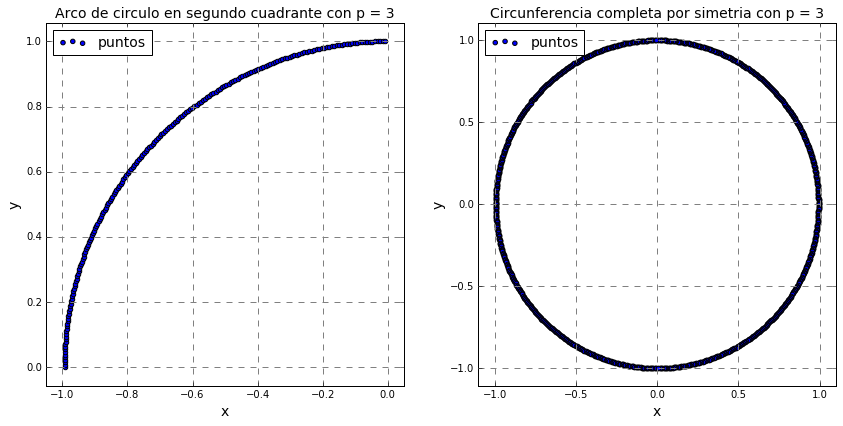

In [28]:
#funcion para graficar mostrando los cambios que ocurren al variar p
def solve_buckling_ring_graphic_1(initial_guess):
    [y2_0, y5_0, y7_0] = initial_guess
    x = []
    y = []
    xi = np.array([(np.pi/2),y2_0,0,0,y5_0,0,y7_0])
    time_grid = np.linspace(0,np.pi/2,200)
    for i in range(len(time_grid)-1):
        x.append(xi[1])
        y.append(xi[2])
        h = time_grid[i+1] - time_grid[i]
        xi = xi + h*F_br(xi)
 
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.scatter(x, y, label = 'puntos')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Arco de circulo en segundo cuadrante con p = " + str(p),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(-1,0)
    plt.ylim(0,1)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    x = x + (np.dot(x,-1)).tolist()
    y = y + y
    x = x + (np.dot(x,-1)).tolist() + (np.dot(x,-1)).tolist() + x
    y = y + y + (np.dot(y,-1)).tolist() + (np.dot(y,-1)).tolist()
    
    #grafico circulo completo con p = 0
    ax1 = plt.subplot(gs[1])
    ax1.scatter(x, y, label = 'puntos')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.title("Circunferencia completa por simetria con p = " + str(p),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()
    
#Graficamos con p = 0
p = 0
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
#x12 = broyden(solve_buckling_ring, initial_guess , np.identity(3))
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_1(initial_guess_p_0)

#Graficamos con p = 3
p = 3
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
#x12 = broyden(solve_buckling_ring, initial_guess , np.identity(3))
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_1(initial_guess_p_0)

Nos damos cuenta de que tanto con presión _p = 0_ como presión _p = 3_ el anillo no se deforma. Esto lo podremos comprobar con la solución que nos presenta el capitulo 7 _"Boundary Value Problem"_ del libro _Numerical Analisys_.

<div id='pregunta4' />
### Pregunta 4

<ul style="list-style-type: none;">
    <li> <b>d)</b> Modifique el valor de la presión a <code> p = 3.5 </code>, resuelva el nuevo sistema BVP y grafique cada solución encontrada ¿Que conclusión se puede desprender del parámetro <code> p </code>? Realice un análisis cualitativo y cuantitativo del fenómeno. 
    </li>
    
</ul>

Modificando el valor de la presión a _p = 3.5_  nos queda el siguiente grafico (y dando el mismo _initial guess y2(0)_ ,_y5(0)_ e _y7(0)_ a nuestro problema [0,0,0] ): 

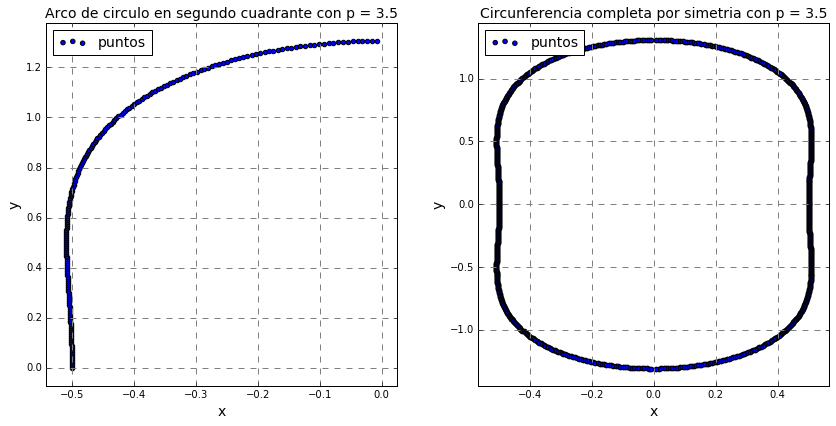

In [29]:
#Graficamos con p = 3.5
p = 3.5
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
#x12 = broyden(solve_buckling_ring, initial_guess , np.identity(3))
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_1(initial_guess_p_0)

Nos damos cuenta que el anillo empieza a presentar una pequeña deformación en el eje _x_, y como consecuencia el eje _y_ aumenta un poco más. Esto hace logica a la relación que tiene la presion _p_ con la constante de compresibilidad _c_. Al mantener _c_ constante y aumentar la presión, vemos que nuestro anillo empieza deformarse, por lo que concluimos que _p_ es un factor muy importante a considerar en la construcción dela anillo. Es importante destacar que según lo visto en la pregunta anterior, el anillo tiene un cierto aguante respecto al aumento o disminucion de _p_ y la variable _c_, es decir, manteniendo _c_ fijo puedo disminuir o aumentar _p_ un cierto limite sin que se deforme el anillo. Mostraremos entonces otros casos con distintos _p_, manteniendo c constante:

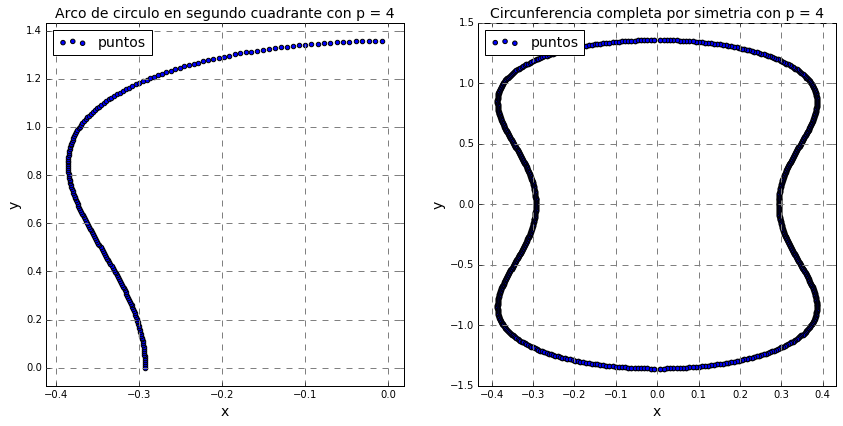

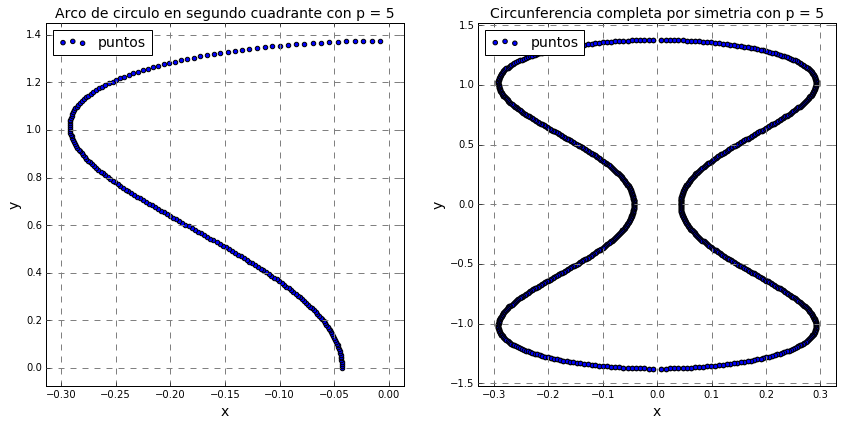

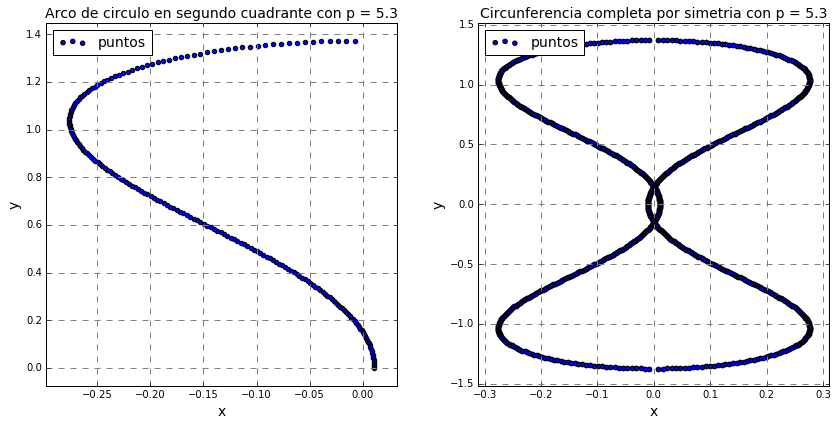

In [30]:
p = 4
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_1(initial_guess_p_0)

p = 5
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_1(initial_guess_p_0)

p = 5.3
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_1(initial_guess_p_0)

Vemos en el caso particular de _p=5.3_ el anillo se deformó totalmente segun el gráfico, lo que nos dice que fisicamente el anillo se deforma completamente, o en su defecto se rompe. Para esto, deberemos usar la constante de compresibilidad _c_. Si aumentamos _c_, quiere decir que se necesitará de una mayor presión para deformar el anillo, por lo que concluimos que ambas variables tienen una relación directamente proporcional, es decir, a medida que aumente la presión, para que el anillo no se deforme deberemos aumentar la constante de compresibilidad. Comprobaremos la teoria propuesta aumentando el c en el ejemplo anterior donde se deformó completamente el anillo.


In [31]:
#funcion para graficar mostrando los cambios que ocurren al variar c
def solve_buckling_ring_graphic_2(initial_guess):
    [y2_0, y5_0, y7_0] = initial_guess
    x = []
    y = []
    xi = np.array([(np.pi/2),y2_0,0,0,y5_0,0,y7_0])
    time_grid = np.linspace(0,np.pi/2,200)
    for i in range(len(time_grid)-1):
        x.append(xi[1])
        y.append(xi[2])
        h = time_grid[i+1] - time_grid[i]
        xi = xi + h*F_br(xi)
 
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.scatter(x, y, label = 'puntos')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Arco de circulo en segundo cuadrante con c = " + str(c),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(-1,0)
    plt.ylim(0,1)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    x = x + (np.dot(x,-1)).tolist()
    y = y + y
    x = x + (np.dot(x,-1)).tolist() + (np.dot(x,-1)).tolist() + x
    y = y + y + (np.dot(y,-1)).tolist() + (np.dot(y,-1)).tolist()
    
    #grafico circulo completo con p = 0
    ax1 = plt.subplot(gs[1])
    ax1.scatter(x, y, label = 'puntos')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.title("Circunferencia completa por simetria con c = " + str(c),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()

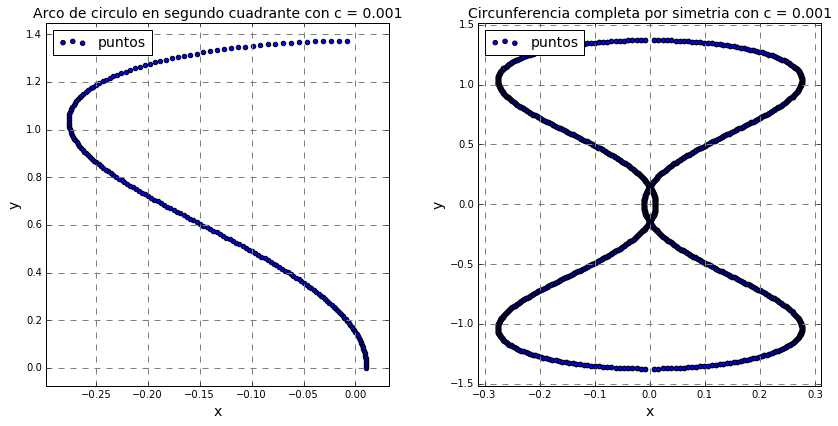

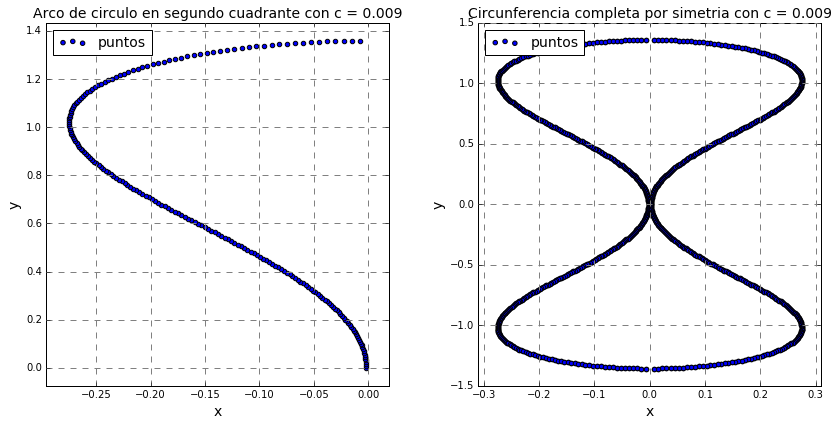

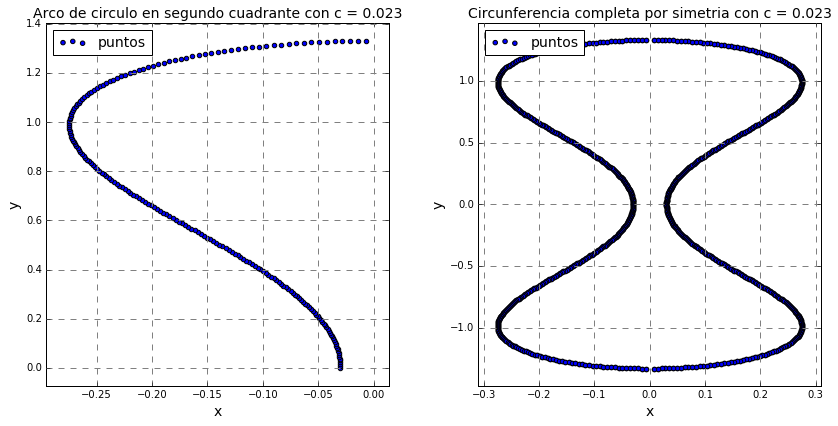

In [32]:
#constante de compresibilidad = 0.001
p = 5.3
c = 0.001
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_2(initial_guess_p_0)

#constante de compresibilidad = 0.009
p = 5.3
c = 0.009
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_2(initial_guess_p_0)

#constante de compresibilidad = 0.023
p = 5.3
c = 0.023
initial_guess = [0,0,0]
xsol = solve_buckling_ring(initial_guess)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
resultado = x1
x2 = solve_buckling_ring(resultado)    
initial_guess_p_0 = x1
solve_buckling_ring_graphic_2(initial_guess_p_0)

Nos damos cuenta de que al aumentar la constante de compresibilidad, el anillo sigue deformandose igual, pero tiene una deformacion donde el anillo aun no se rompe por completo (segun el grafico, esta en su limite), por lo que comprobamos lo dicho anteriormente. Es importante destacar que en el segundo gráfico, encontramos un límite donde con una cierta constante de compresibilidad, tenemos la presión máxima donde el anillo aun resiste, y pasado este límite el anillo se rompe, por lo que haciendo un analisis mas profundo podriamos descubrir para una cierta constante c, cual es el límite máximo que soporta el anillo sin quebrarse. 

<div id='bon' />
###### <h2>BONUS (30 pt)</h2>
<p>Para el mismo problema, implemente el  <b>Método de Diferencias Finitas</b> (DF) con sus condiciones de bordes correspondientes (use los resultados obtenidos en el punto <b>b)</b> de la sección anterior). Para ello, defina una malla de puntos equidistante con $h = \frac{\pi}{2\,n}$ ($n=4$) y genere una discretización de cada una de las derivadas. El objetivo de este procedimiento es generar un  <b>sistema de ecuaciones no-lineales</b>.

Además, realice un análisis del tiempo computacional (variando $n$) requerido para este algoritmo y compare sus resultados con los obtenidos con el método del disparo.</p>

Para implementar las diferencias finitas, tenemos tres formas de aproximar la derivada, las cuales son _forward_, _central_ y _backward_ _different_. Para este caso, usaremos _forward different_, por lo cual en cada ecuación, nos quedara el termino siguiente (es decir mas un h), de la siguiente forma:
            $$ y_{i}(x+h) = y_i{x} + h*f(\cdots) $$
Sabiendo esto, implementamos la función _F-finite-different_ la cual hara que cada ecuacion del _buckling circle_ tenga esta estructura, para luego resolverla por medio de diferencias finitas (por lo que nos quedaria una matriz, donde cada termino $y_i(x+h)$ formara una columna de la matriz). Finalmente, graficamos las soluciones, para ver si nuestro método esta en lo correcto:

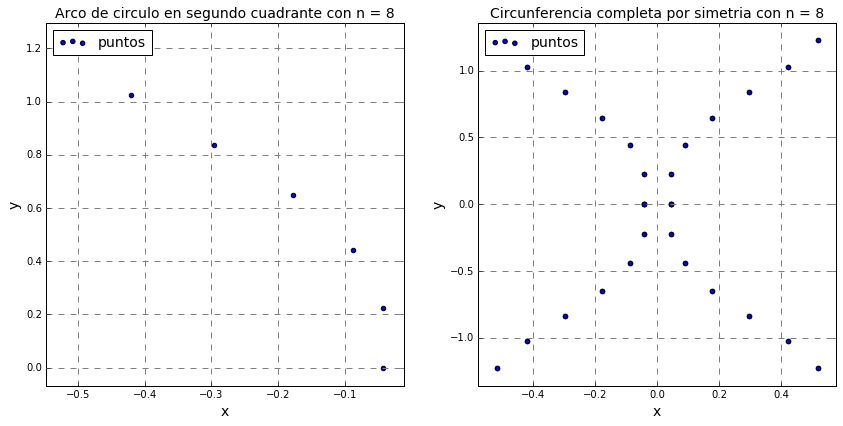

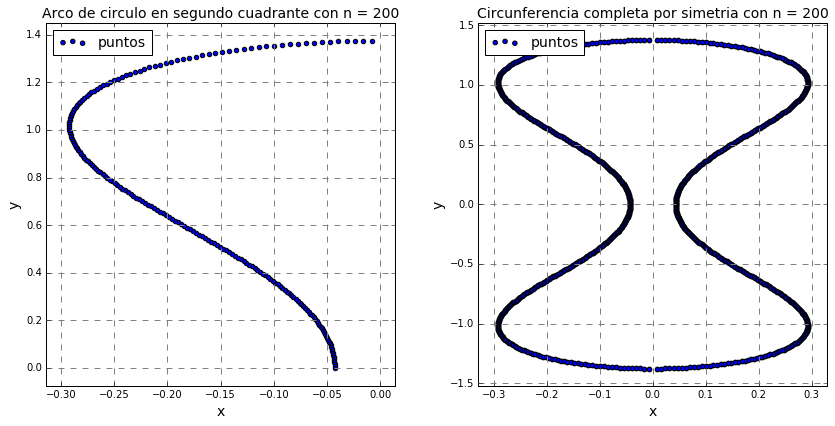

In [33]:
def F_finite_diferent(y,h):
    sol_dif = []
    sol_dif.append(y[0] + h*(-1 - c*y[4] + (c+1)*y[6]))
    sol_dif.append(y[1] + h*((1+c*(y[4]-y[6]))*np.cos(y[0])))
    sol_dif.append(y[2] + h*((1+c*(y[4]-y[6]))*np.sin(y[0])))
    sol_dif.append(y[3] + h*(1 + c*(y[4]-y[6])))
    sol_dif.append(y[4] + h*(-y[5]*(-1-c*y[4]+(c+1)*y[6])))
    sol_dif.append(y[5] + h*(y[6]*y[4]-(1+c*(y[4]-y[6]))*(y[4]+p)))
    sol_dif.append(y[6] + h*((1+c*(y[4]-y[6]))*y[5]))
    return np.array(sol_dif)
    
def finite_diferent(y,n):
    [y2_0, y5_0, y7_0] = y
    xi = np.array([(np.pi/2),y2_0,0,0,y5_0,0,y7_0])
    points = (np.pi/2)/(np.pi/(2*n))
    time_grid = np.linspace(0,np.pi/2,points)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        xi = F_finite_diferent(xi,h)
    return np.array([xi[0],xi[1],xi[5]])

def graphic_finite_diferential(initial_guess,n):
    x = []
    y = []
    [y2_0, y5_0, y7_0] = initial_guess
    xi = np.array([np.pi/2,y2_0,0,0,y5_0,0,y7_0])
    time_grid = np.linspace(0,np.pi/2,((np.pi/2)/(np.pi/(2*n))))
    for i in range(0,len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        x.append(xi[1])
        y.append(xi[2])
        xi = F_finite_diferent(xi,h)
 
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.scatter(x, y, label = 'puntos')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Arco de circulo en segundo cuadrante con n = " + str(n),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(-1,0)
    plt.ylim(0,1)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    x = x + (np.dot(x,-1)).tolist()
    y = y + y
    x = x + (np.dot(x,-1)).tolist() + (np.dot(x,-1)).tolist() + x
    y = y + y + (np.dot(y,-1)).tolist() + (np.dot(y,-1)).tolist()
    
    #grafico circulo completo con p = 0
    ax1 = plt.subplot(gs[1])
    ax1.scatter(x, y, label = 'puntos')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.title("Circunferencia completa por simetria con n = " + str(n),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()

p = 5
c = 0.001
initial_guess = [0,0,0]

variable1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
graphic_finite_diferential(variable1,8)
graphic_finite_diferential(variable1,200)

#solve_buckling_ring_graphic_(x1)

Nos damos cuenta que con nuestro metodo con un $h = \frac{\pi}{2\,n}$ ($n=4$), el metodo se parece a nuestra figura con presión = 5.5, y si aumentamos nuestro n a 200, nos damos cuenta que efectivamente ya tenemos nuestra figura obtenida en los graficos de la pregunta anterior. 

Luego, obtendremos el error de nuestro método de diferencias finitas con n = 4 y 200 contra el método del disparo implementado anteriormente:

In [34]:
variable1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
variable2 = finite_diferent(variable1,200)
variable3 = solve_buckling_ring(variable1)
variable4 = finite_diferent(variable1,4)
print("Error entre metodo del disparo y diferencias finitas con n = 4: ")
print(np.linalg.norm(variable3 - variable4))

print("Error entre metodo del disparo y diferencias finitas con n = 200: ")
print(np.linalg.norm(variable3 - variable2))

Error entre metodo del disparo y diferencias finitas con n = 4: 
8.68791191511
Error entre metodo del disparo y diferencias finitas con n = 200: 
0.000439998230301


Nos damos cuenta que con n = 4, el error es bastante grande, ya que son muy pocos puntos los que graficamos, mientrsas que con n = 200 el error disminuye bastante, siendo bastante aceptable. Finalmente, haremos un gráfico donde veremos como se comporta nuestro metodo a medida que el tiempo crece:

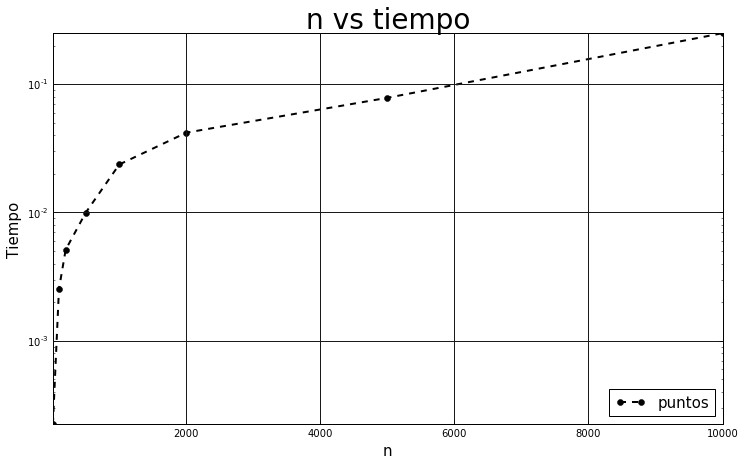

In [35]:
n_para_calcular_tiempo = [10,100,200,500,1000, 2000,5000,10000]
resultado = [0,0,0,0,0,0,0,0]
for i in range(100):
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[0])
    resultado[0] = time.time() - tiempo_inicial
                
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[1])
    resultado[1] = time.time() - tiempo_inicial
                
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[2])
    resultado[2] = time.time() - tiempo_inicial
                
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[3])
    resultado[3] = time.time() - tiempo_inicial
    
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[4])
    resultado[4] = time.time() - tiempo_inicial
    
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[5])
    resultado[5] = time.time() - tiempo_inicial
    
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[6])
    resultado[6] = time.time() - tiempo_inicial
    
    tiempo_inicial = time.time()
    finite_diferent(variable1,n_para_calcular_tiempo[7])
    resultado[7] = time.time() - tiempo_inicial

plt.figure(figsize=(12,7))
plt.semilogy(n_para_calcular_tiempo, resultado, '--ko', linewidth = 2, label = 'puntos')
plt.legend(loc = 4,prop={'size':15})
plt.xlabel("n", fontsize = 15)
plt.ylabel("Tiempo", fontsize = 15)
plt.grid(True)
plt.grid(color = '0.1', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.title("n vs tiempo",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()

Vemos que a medida que el n aumenta, el tiempo también empieza a aumentar bastante. Disminuye bastante poco en el inicio de la gráfica ya que los n usados para graficar al principio son batstante pequeños en comparación al resto.

<div id='con' />
## Conclusiones

Gracias a este laboratorio se pudo apreciar como aplicar correctamente el uso de distintos metodos para resolver sistemas de ecuaciones diferenciales, encontrando soluciones muy parecidas a la solucion real esperada. Ademas, podemos ver visualmente como el anillo del submarino que estamos analizando se deforma si cambiamos ciertas variables de presión y compresibilidad, por lo que debemos adaptar las condiciones iniciales dadas de tal manera que calcen con el problema. Finalmente, para realizar esto, sirve de mucho el estudio y aplicación del metodo de Broyden, el cual nos encuentra los valores iniciales correctos tras resolver un sistema de ecuaciones no lineales.

<div id='ref' />
<h2> Referencias </h2>
<ol>
<li> '<i>Numerical Analysis</i>', Timothy Sauer, Chapter 7 "Boundary Value Problem</li> $$$$
<li> '<i>Lecture 13.  Numerical Solution of Nonlinear Equations in $R^n$</i>' http://www.math.hkbu.edu.hk/~zeng/Teaching/math3620/Lecture_13_Nonlinear_root_nd.pdf </li> $$$$
<li>
_"Introducción al Método de Diferencias Finitas y su Implementación Computacional"_
http://www.mmc.geofisica.unam.mx/femp/Ejemplitos/F_M/FDM/Introducción%20al%20Método%20de%20Diferencias%20Finitas%20y%20su%20Implementación%20Computacional.pdf </li>
</ol>
